In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [54]:
file_path = 'Training.csv'
# Read the CSV file using the specified character encoding
df = pd.read_csv(file_path, encoding='ascii')

In [55]:
# Show the head of the dataframe
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [56]:
# Describe the dataframe
df.describe()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,Unnamed: 133
count,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,...,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,4920.000000,0.0
mean,0.137805,0.159756,0.021951,0.045122,0.021951,0.162195,0.139024,0.045122,0.045122,0.021951,...,0.021951,0.021951,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,0.023171,NaN
std,0.344730,0.366417,0.146539,0.207593,0.146539,0.368667,0.346007,0.207593,0.207593,0.146539,...,0.146539,0.146539,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,0.150461,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [57]:
df.isnull().sum()

itching                    0
skin_rash                  0
nodal_skin_eruptions       0
continuous_sneezing        0
shivering                  0
                        ... 
blister                    0
red_sore_around_nose       0
yellow_crust_ooze          0
prognosis                  0
Unnamed: 133            4920
Length: 134, dtype: int64

In [58]:
df.dropna(axis=1,inplace=True)

In [59]:
df.isnull().sum()

itching                 0
skin_rash               0
nodal_skin_eruptions    0
continuous_sneezing     0
shivering               0
                       ..
inflammatory_nails      0
blister                 0
red_sore_around_nose    0
yellow_crust_ooze       0
prognosis               0
Length: 133, dtype: int64

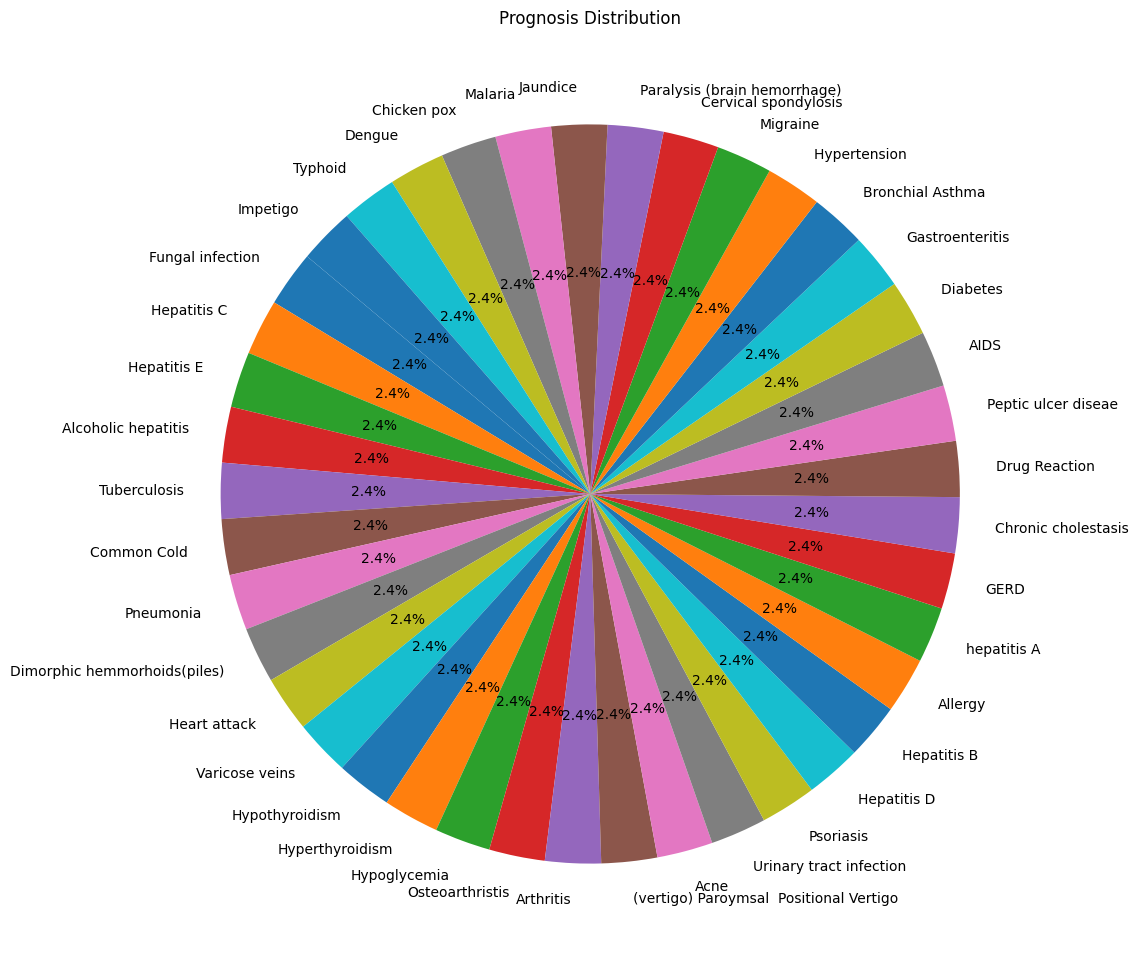

In [60]:
prognosis_counts = df['prognosis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(12, 12))
plt.pie(prognosis_counts, labels=prognosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Prognosis Distribution')
plt.show()

In [61]:
for i in df.columns:
    if df[i].dtype == 'O':
        l_e = LabelEncoder()
        l_e.fit(df[i])
        df[i] = l_e.transform(df[i])
        file = open(f'pipeline/label encoding/{i}_label.pickle', 'wb')
        pickle.dump(l_e, file)
        

In [62]:
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,15


In [63]:
y = df['prognosis']
x = df.drop('prognosis',axis=1)

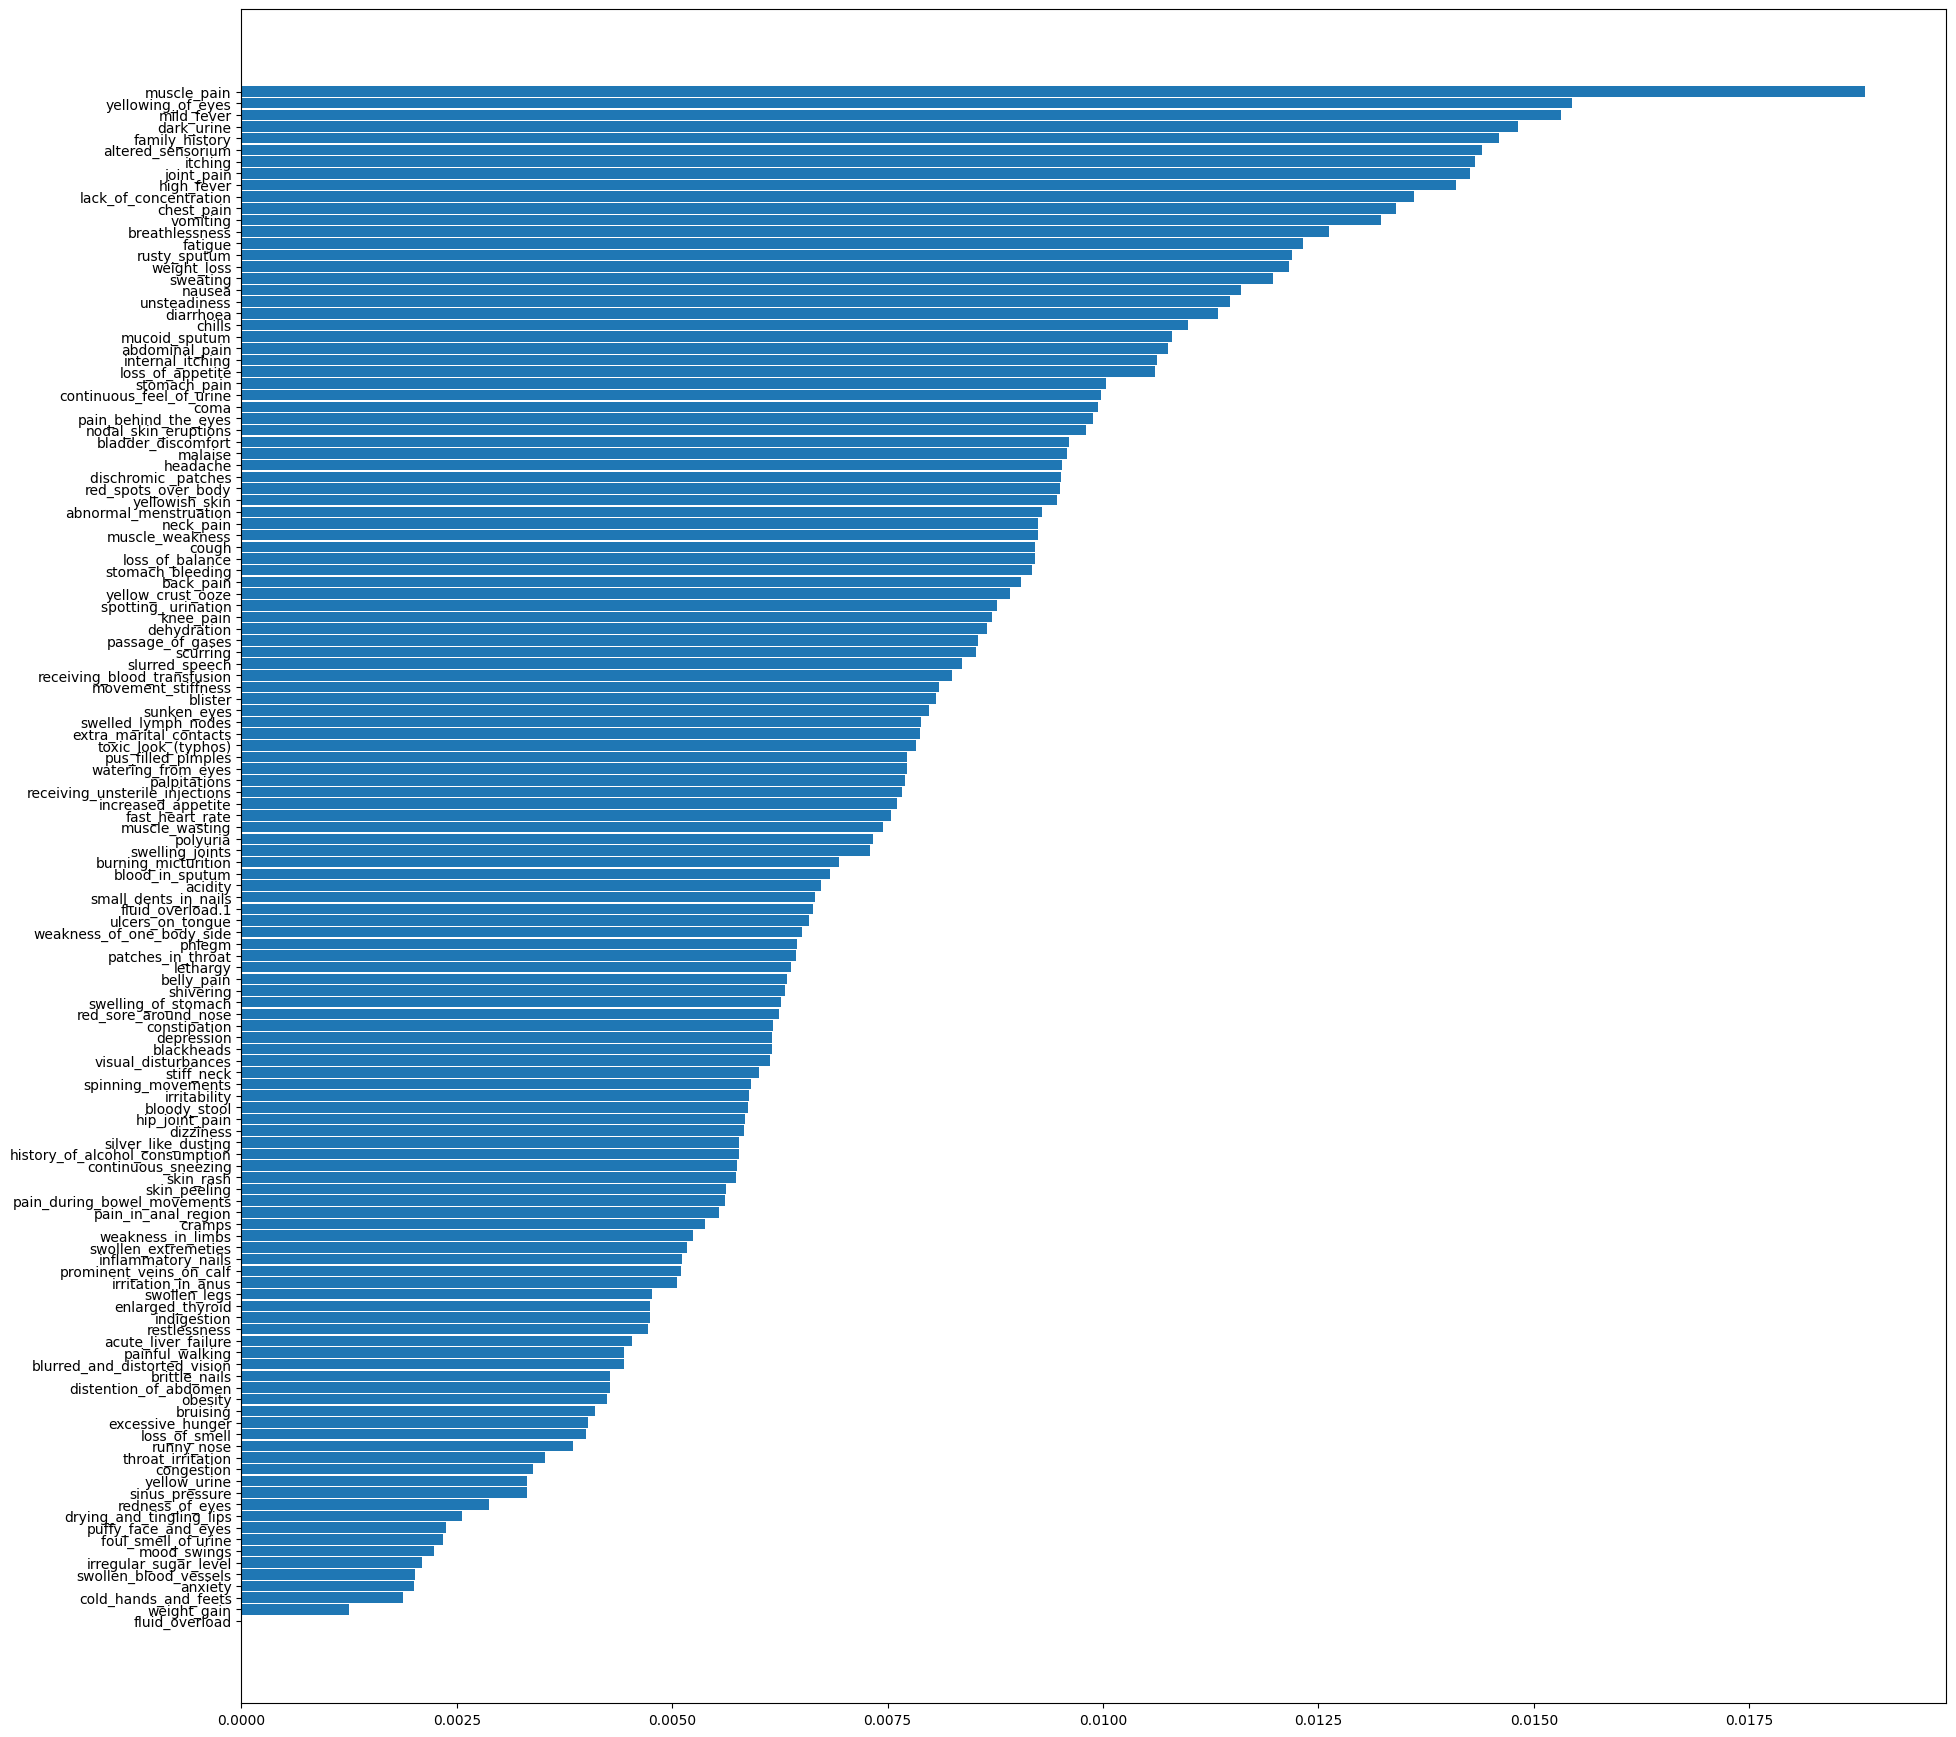

In [64]:
r_f = RandomForestClassifier(n_estimators=200)
fit = r_f.fit(x.to_numpy(), y.to_numpy())

plt.figure(figsize=(22, 22))

f_i = list(zip(x.columns,fit.feature_importances_))
f_i.sort(key = lambda x : x[1])
plt.barh([x[0] for x in f_i],[x[1] for x in f_i], height=0.9)

plt.show()

In [65]:
[x[0] for x in f_i][:70]

['fluid_overload',
 'weight_gain',
 'cold_hands_and_feets',
 'anxiety',
 'swollen_blood_vessels',
 'irregular_sugar_level',
 'mood_swings',
 'foul_smell_of urine',
 'puffy_face_and_eyes',
 'drying_and_tingling_lips',
 'redness_of_eyes',
 'sinus_pressure',
 'yellow_urine',
 'congestion',
 'throat_irritation',
 'runny_nose',
 'loss_of_smell',
 'excessive_hunger',
 'bruising',
 'obesity',
 'distention_of_abdomen',
 'brittle_nails',
 'blurred_and_distorted_vision',
 'painful_walking',
 'acute_liver_failure',
 'restlessness',
 'indigestion',
 'enlarged_thyroid',
 'swollen_legs',
 'irritation_in_anus',
 'prominent_veins_on_calf',
 'inflammatory_nails',
 'swollen_extremeties',
 'weakness_in_limbs',
 'cramps',
 'pain_in_anal_region',
 'pain_during_bowel_movements',
 'skin_peeling',
 'skin_rash',
 'continuous_sneezing',
 'history_of_alcohol_consumption',
 'silver_like_dusting',
 'dizziness',
 'hip_joint_pain',
 'bloody_stool',
 'irritability',
 'spinning_movements',
 'stiff_neck',
 'visual_dist

In [66]:
x = x.drop([x[0] for x in f_i][:75],axis="columns")

In [67]:
x.head()

,itching,nodal_skin_eruptions,chills,joint_pain,stomach_pain,vomiting,spotting_ urination,fatigue,weight_loss,cough,...,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,receiving_blood_transfusion,coma,stomach_bleeding,scurring,blister,yellow_crust_ooze
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
x.columns

Index(['itching', 'nodal_skin_eruptions', 'chills', 'joint_pain',
       'stomach_pain', 'vomiting', 'spotting_ urination', 'fatigue',
       'weight_loss', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness',
       'sweating', 'dehydration', 'headache', 'yellowish_skin', 'dark_urine',
       'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellowing_of_eyes',
       'swelled_lymph_nodes', 'malaise', 'chest_pain', 'neck_pain',
       'extra_marital_contacts', 'slurred_speech', 'knee_pain',
       'muscle_weakness', 'movement_stiffness', 'loss_of_balance',
       'unsteadiness', 'bladder_discomfort', 'continuous_feel_of_urine',
       'passage_of_gases', 'internal_itching', 'toxic_look_(typhos)',
       'muscle_pain', 'altered_sensorium', 'red_spots_over_body',
       'abnormal_menstruation', 'dischromic _patches', 'family_history',
       'mucoid_sputum', 'rusty_sputum', 'lack_of_concentration',
       'receivin

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

## RandomForestClassifier

In [70]:
rf_classifier = RandomForestClassifier()

# rf_classifier.fit(x_train,y_train)
# file = open(f"model/randomforest.pickle", 'wb')
# pickle.dump(rf_classifier, file)

In [71]:
file = open(f"model/randomforest.pickle" ,'rb')
rf_classifier = pickle.load(file)

/home/shukur/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([31])

In [72]:
y_pred_0 = rf_classifier.predict(x_test)
print(f"Train accuracy : {round(accuracy_score(y_train, rf_classifier.predict(x_train))*100,2)}% \nTest accuracy : {round(accuracy_score(y_test, y_pred_0)*100,2)}%")

Train accuracy : 99.04% 
Test accuracy : 98.98%


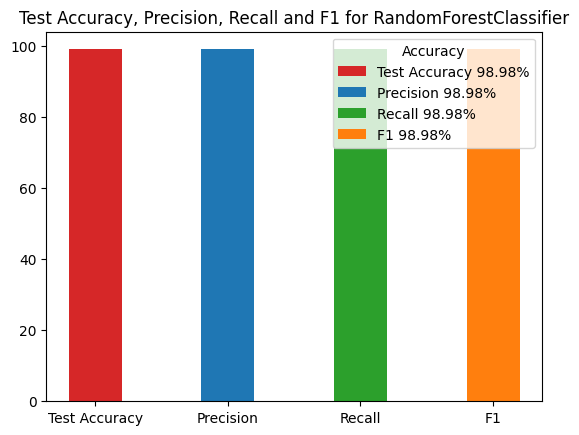

In [73]:
accuracy = accuracy_score(y_test, y_pred_0) * 100
precision = precision_score(y_test, y_pred_0,average='micro')* 100
recall = recall_score(y_test, y_pred_0,average='micro')* 100
f1 = f1_score(y_test, y_pred_0,average='micro') * 100


fig, ax = plt.subplots()
fruits = ['Test Accuracy', 'Precision', 'Recall', 'F1']
counts = [accuracy, precision, recall, f1]
bar_labels = [f"Test Accuracy {round(accuracy,2)}%", f"Precision {round(precision,2)}%",
              f"Recall {round(recall,2)}%", f"F1 {round(f1,2)}%"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.4)

ax.set_title('Test Accuracy, Precision, Recall and F1 for RandomForestClassifier')
ax.legend(title='Accuracy')
plt.show()

In [74]:
file = open("/home/shukur/Documents/Healthcare Predictive Modeling/pipeline/label encoding/prognosis_label.pickle" ,'rb')
y_label_encoding = pickle.load(file)
x_labels = [y_label_encoding.inverse_transform([i])[0] for i in range (41)]
y_labels = [y_label_encoding.inverse_transform([i])[0] for i in range (41)]

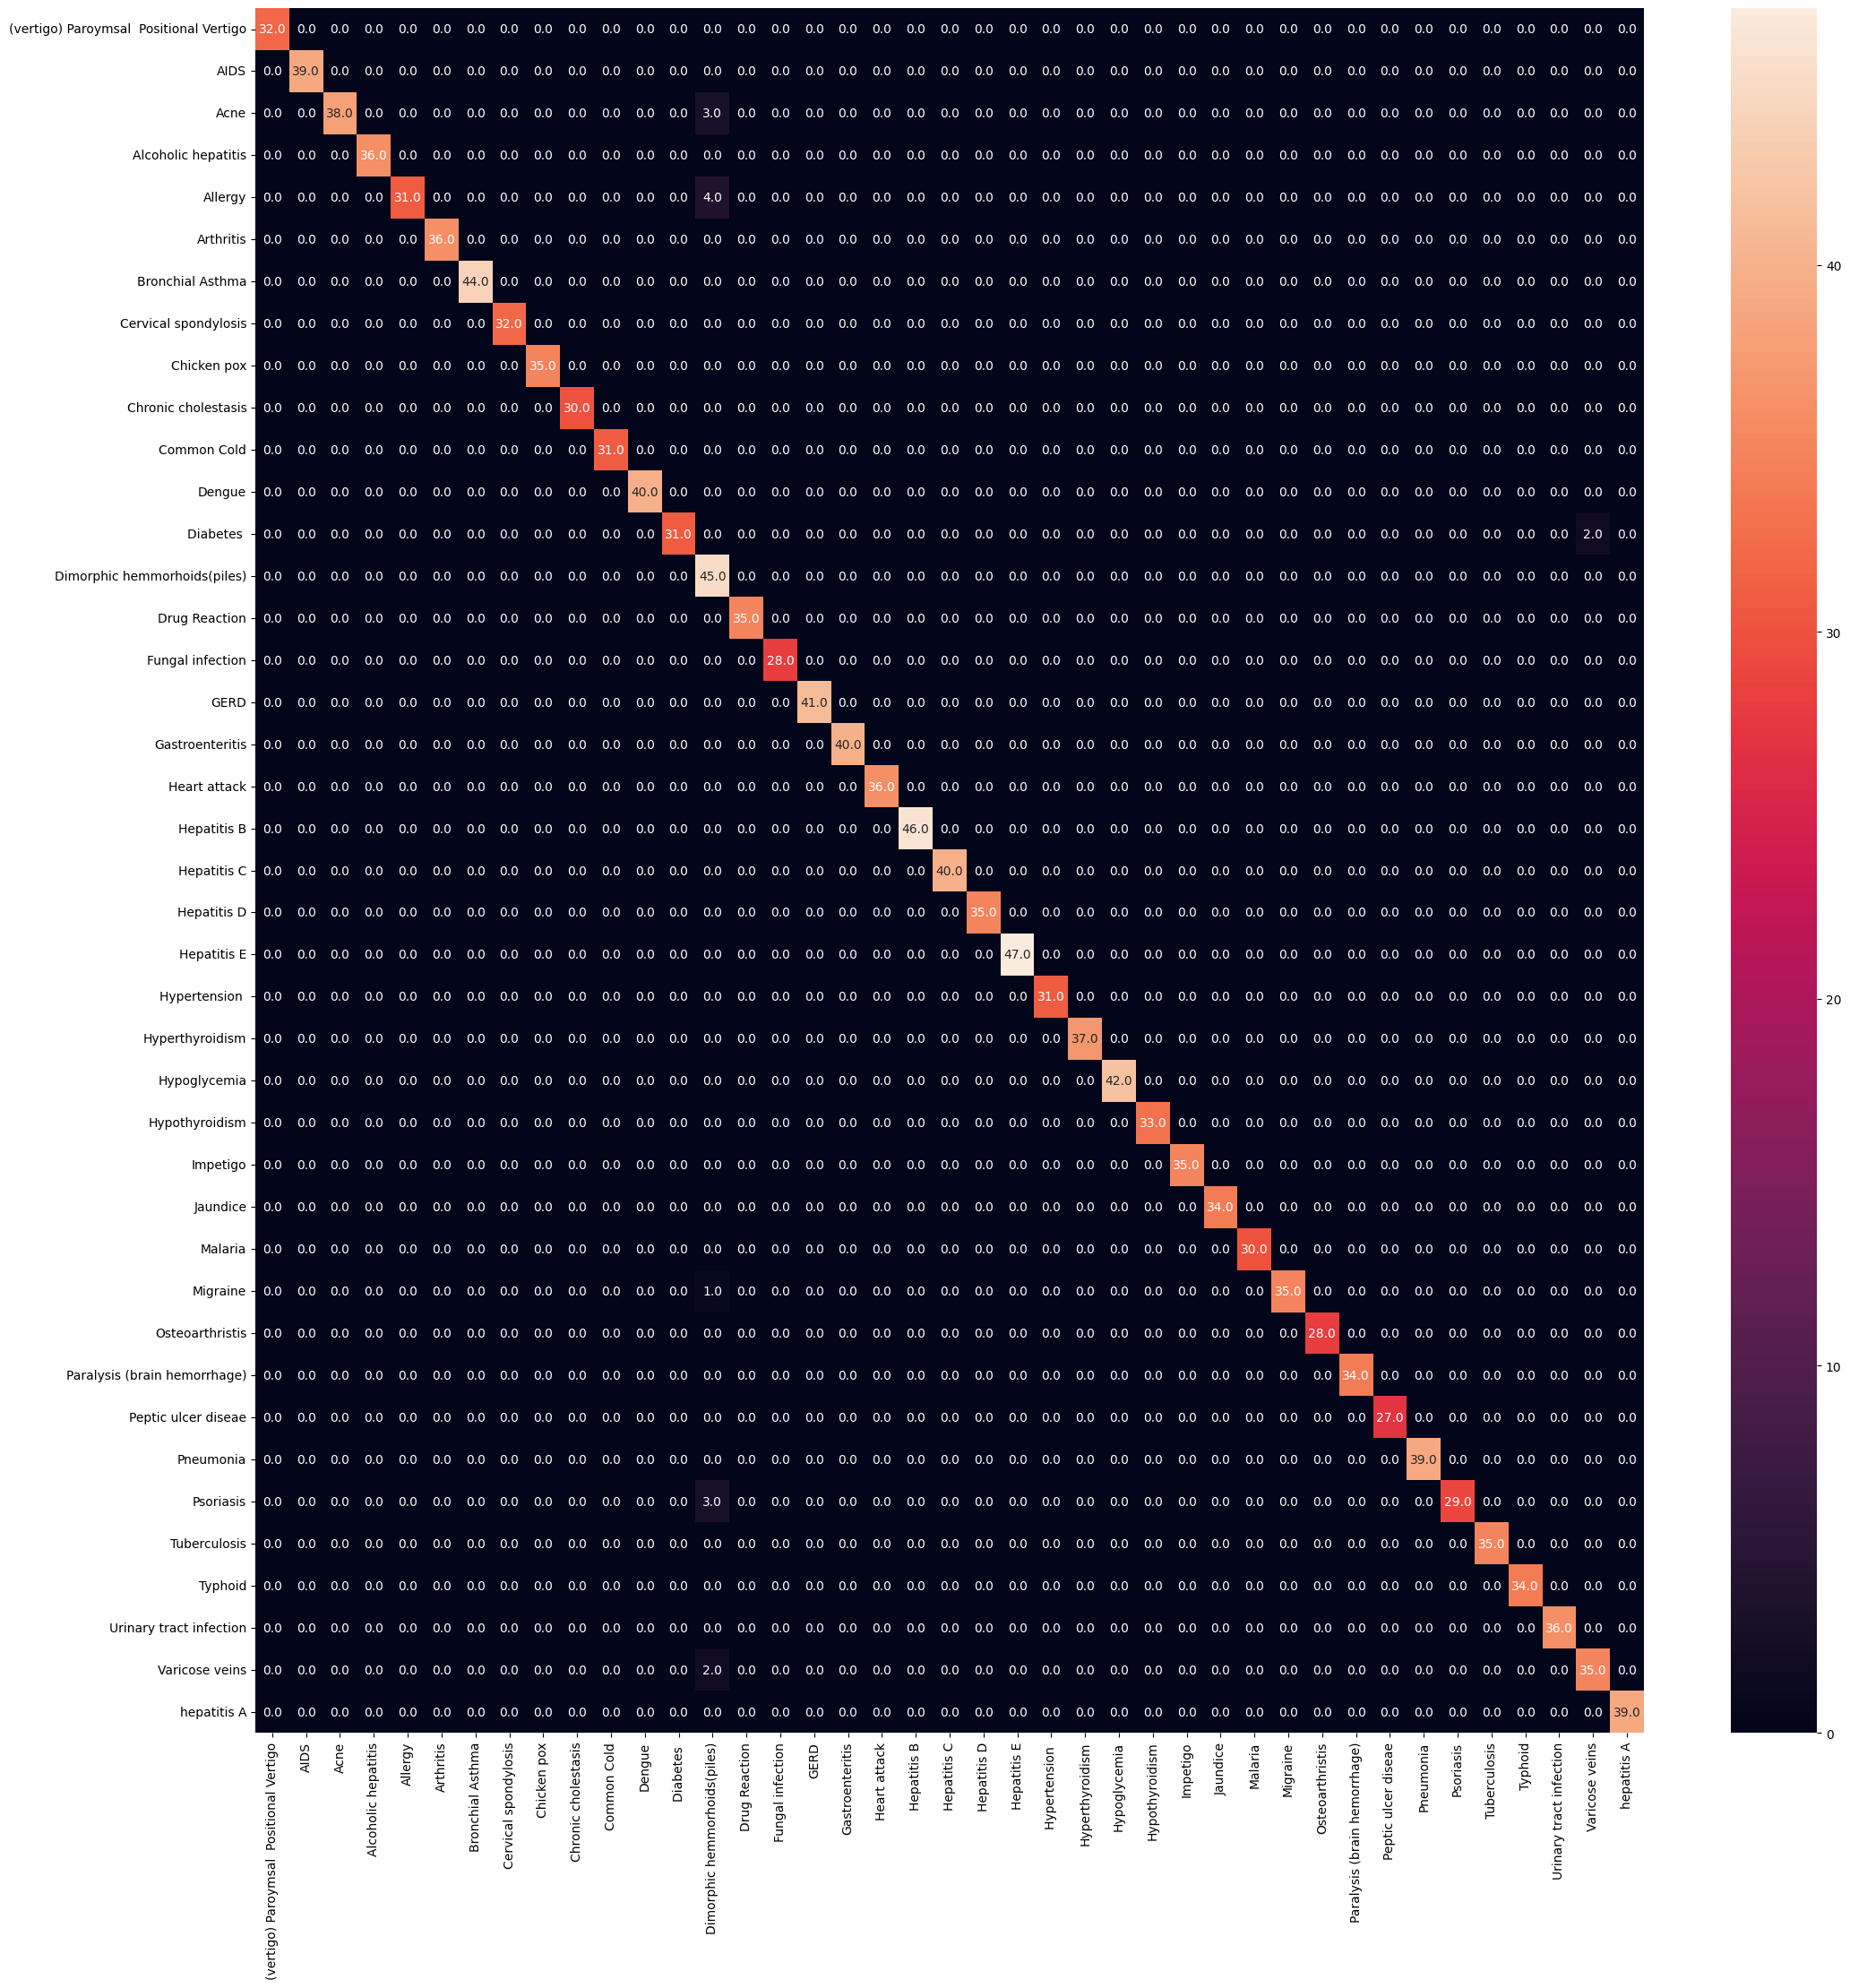

In [75]:
plt.figure(figsize=(25, 25))
sns.heatmap(confusion_matrix(y_test, y_pred_0),annot=True,fmt=".1f",xticklabels=x_labels, yticklabels=y_labels)
plt.show()

## XGBClassifier

In [76]:
x_g =   xgb.XGBClassifier()

# x_g.fit(x_train,y_train)
# file = open(f"model/x_g.pickle", 'wb')
# pickle.dump(x_g, file)

In [77]:
file = open("model/x_g.pickle" ,'rb')
x_g = pickle.load(file)

In [78]:
y_pred_1 = x_g.predict(x_test)
print(f"Train accuracy : {round(accuracy_score(y_train, x_g.predict(x_train))*100,2)}% \nTest accuracy : {round(accuracy_score(y_test, y_pred_1)*100,2)}%")

Train accuracy : 99.04% 
Test accuracy : 98.98%


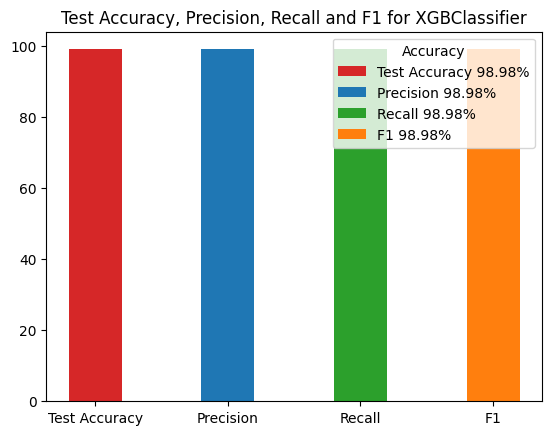

In [79]:
accuracy = accuracy_score(y_test, y_pred_1) * 100
precision = precision_score(y_test, y_pred_1,average='micro')* 100
recall = recall_score(y_test, y_pred_1,average='micro')* 100
f1 = f1_score(y_test, y_pred_1,average='micro') * 100


fig, ax = plt.subplots()
fruits = ['Test Accuracy', 'Precision', 'Recall', 'F1']
counts = [accuracy, precision, recall, f1]
bar_labels = [f"Test Accuracy {round(accuracy,2)}%", f"Precision {round(precision,2)}%",
              f"Recall {round(recall,2)}%", f"F1 {round(f1,2)}%"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.4)

ax.set_title('Test Accuracy, Precision, Recall and F1 for XGBClassifier')
ax.legend(title='Accuracy')
plt.show()

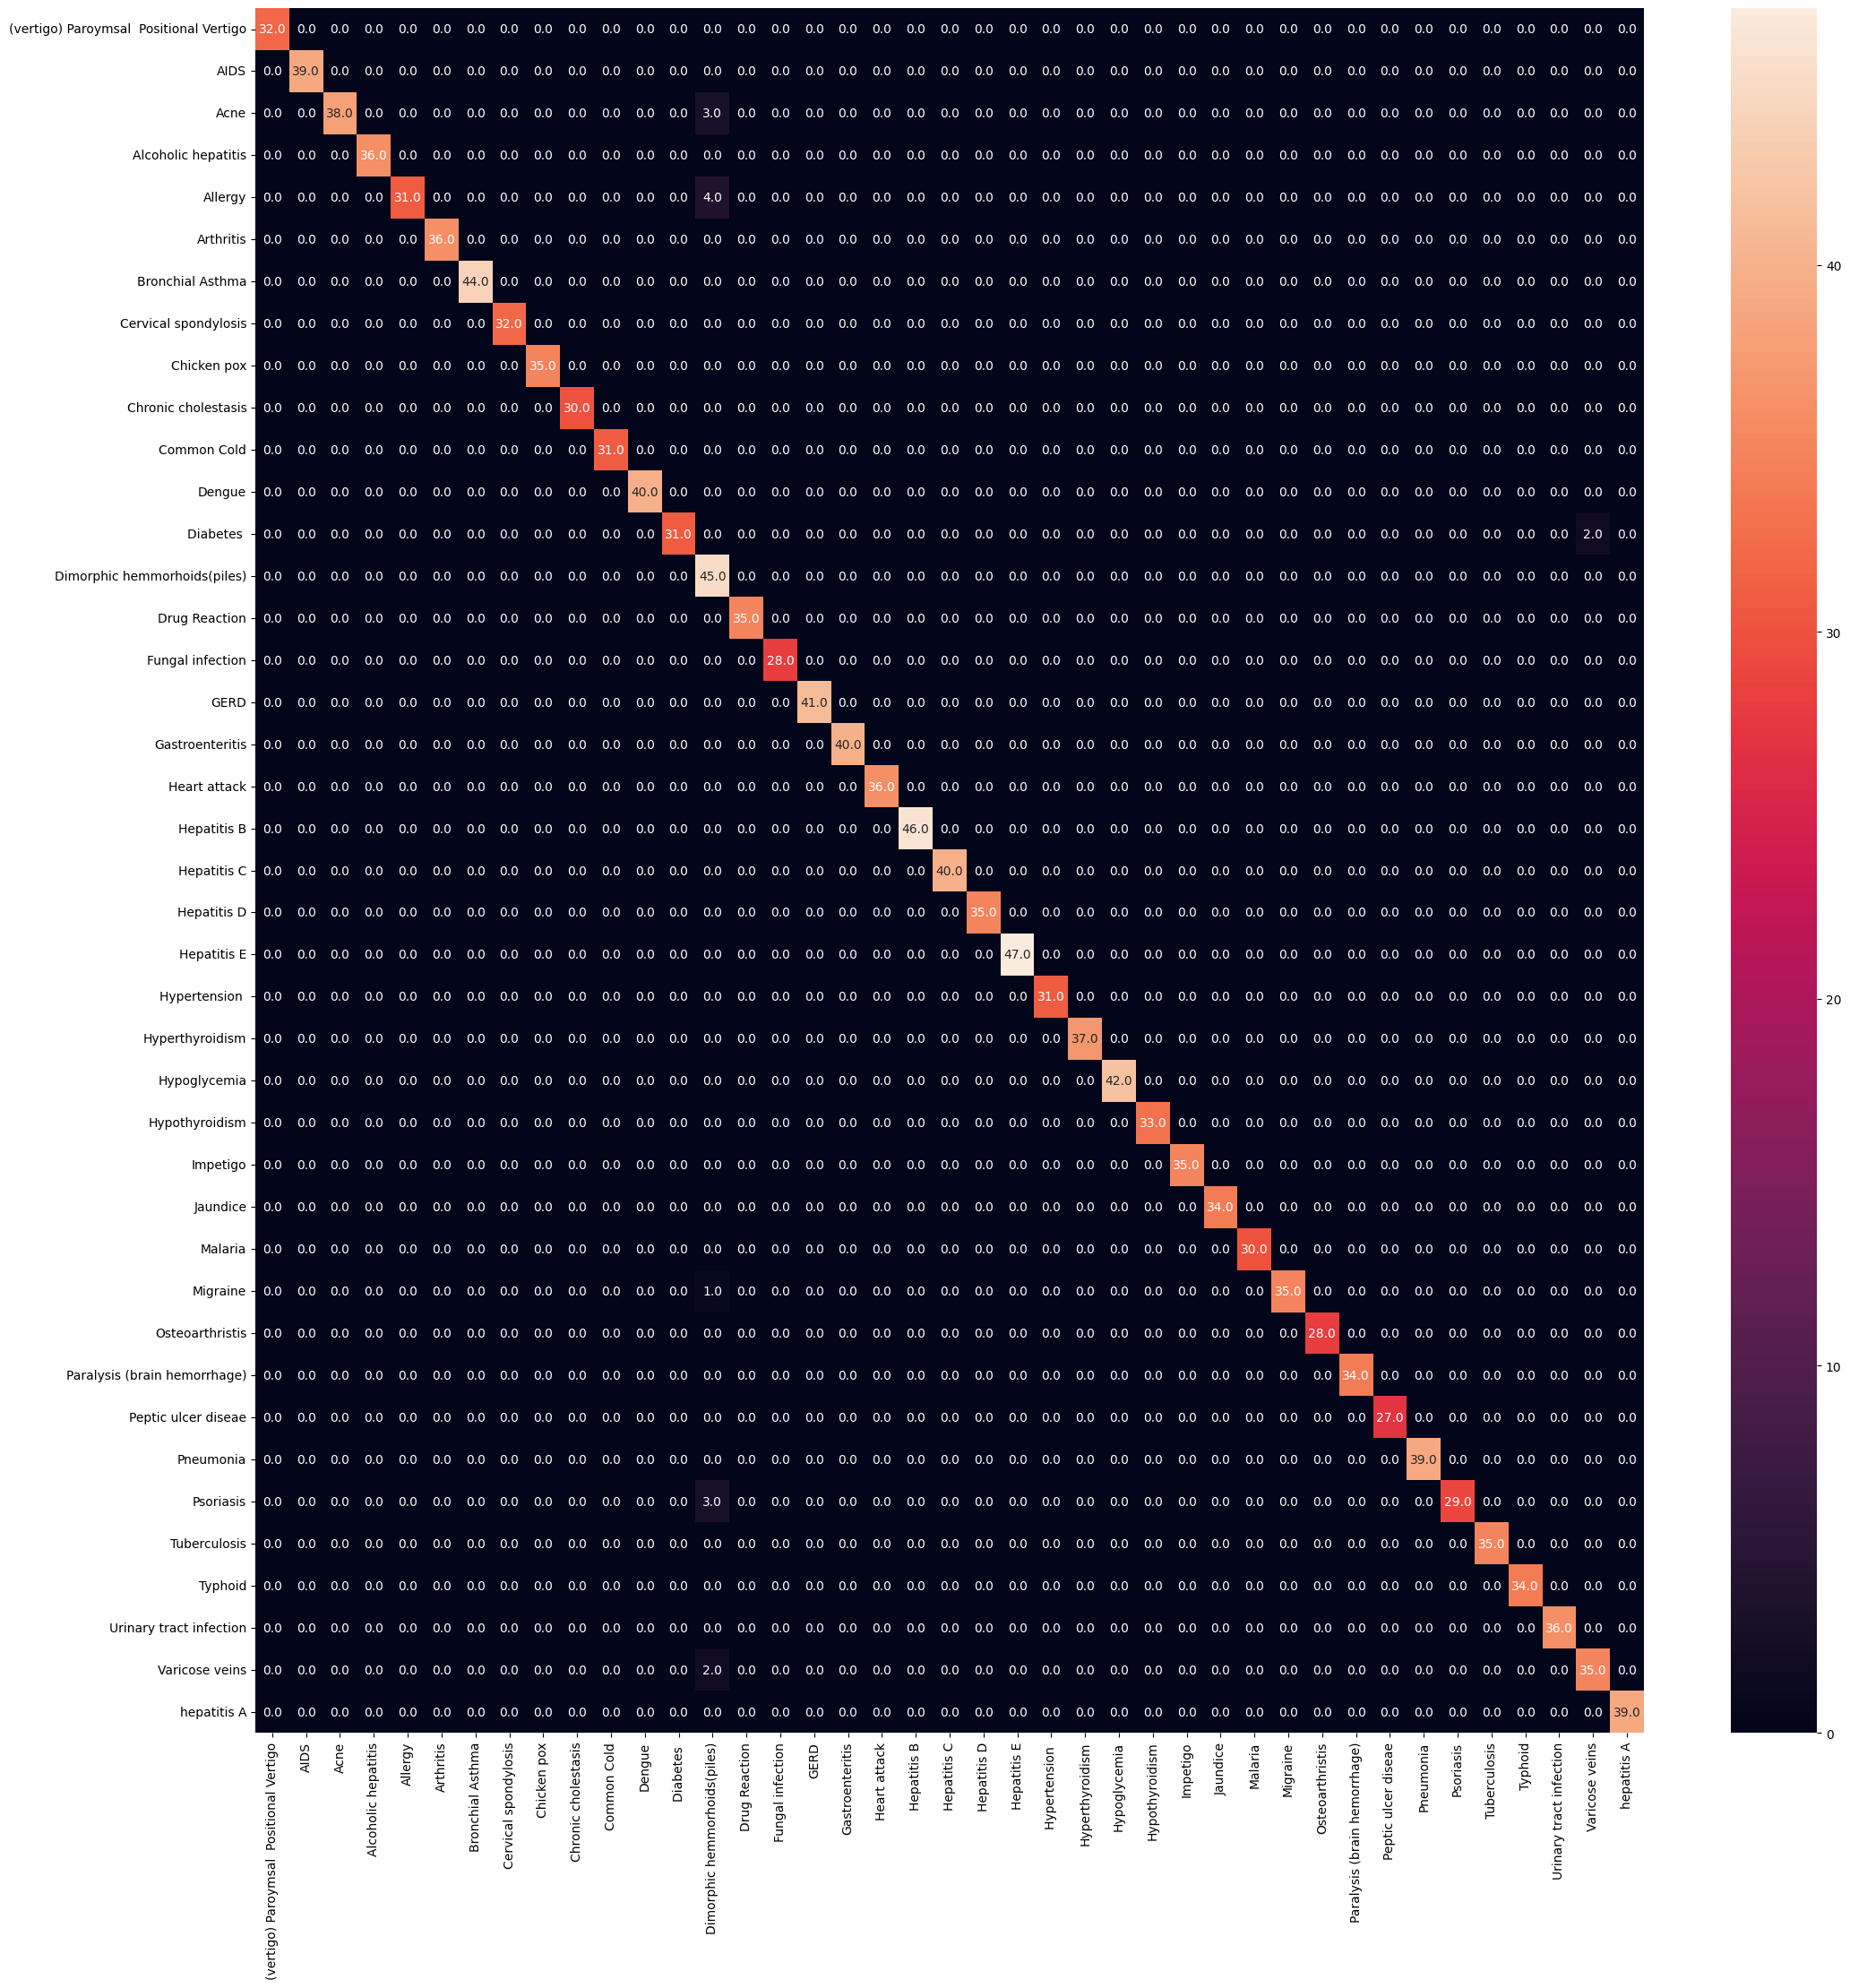

In [80]:
plt.figure(figsize=(25, 25))
sns.heatmap(confusion_matrix(y_test, y_pred_0),annot=True,fmt=".1f",xticklabels=x_labels, yticklabels=y_labels)
plt.show()

## GradientBoostingClassifier

In [81]:
dt_classifier = DecisionTreeClassifier(max_depth=1, random_state=2)


# dt_classifier.fit(x_train,y_train)
# file = open(f"model/dt_classifier.pickle", 'wb')
# pickle.dump(dt_classifier, file)

In [82]:
file = open("model/dt_classifier.pickle" ,'rb')
dt_classifier = pickle.load(file)

In [83]:
y_pred_2 = dt_classifier.predict(x_test)
print(f"Train accuracy : {round(accuracy_score(y_train, dt_classifier.predict(x_train))*100,2)}% \nTest accuracy : {round(accuracy_score(y_test, y_pred_2)*100,2)}%")

Train accuracy : 5.26% 
Test accuracy : 3.59%


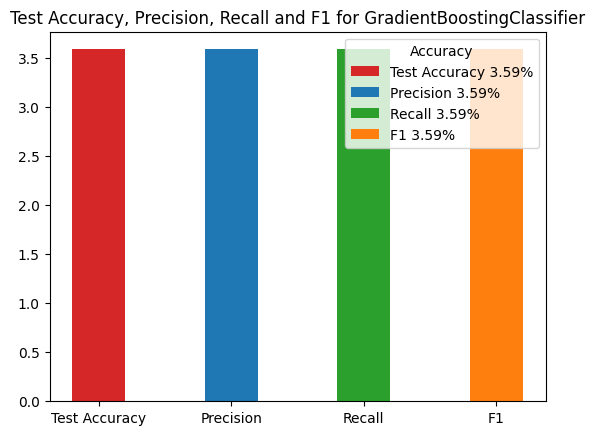

In [84]:
accuracy = accuracy_score(y_test, y_pred_2) * 100
precision = precision_score(y_test, y_pred_2,average='micro')* 100
recall = recall_score(y_test, y_pred_2,average='micro')* 100
f1 = f1_score(y_test, y_pred_2,average='micro') * 100


fig, ax = plt.subplots()
fruits = ['Test Accuracy', 'Precision', 'Recall', 'F1']
counts = [accuracy, precision, recall, f1]
bar_labels = [f"Test Accuracy {round(accuracy,2)}%", f"Precision {round(precision,2)}%",
              f"Recall {round(recall,2)}%", f"F1 {round(f1,2)}%"]
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(fruits, counts, label=bar_labels, color=bar_colors,width=0.4)

ax.set_title('Test Accuracy, Precision, Recall and F1 for GradientBoostingClassifier')
ax.legend(title='Accuracy')
plt.show()

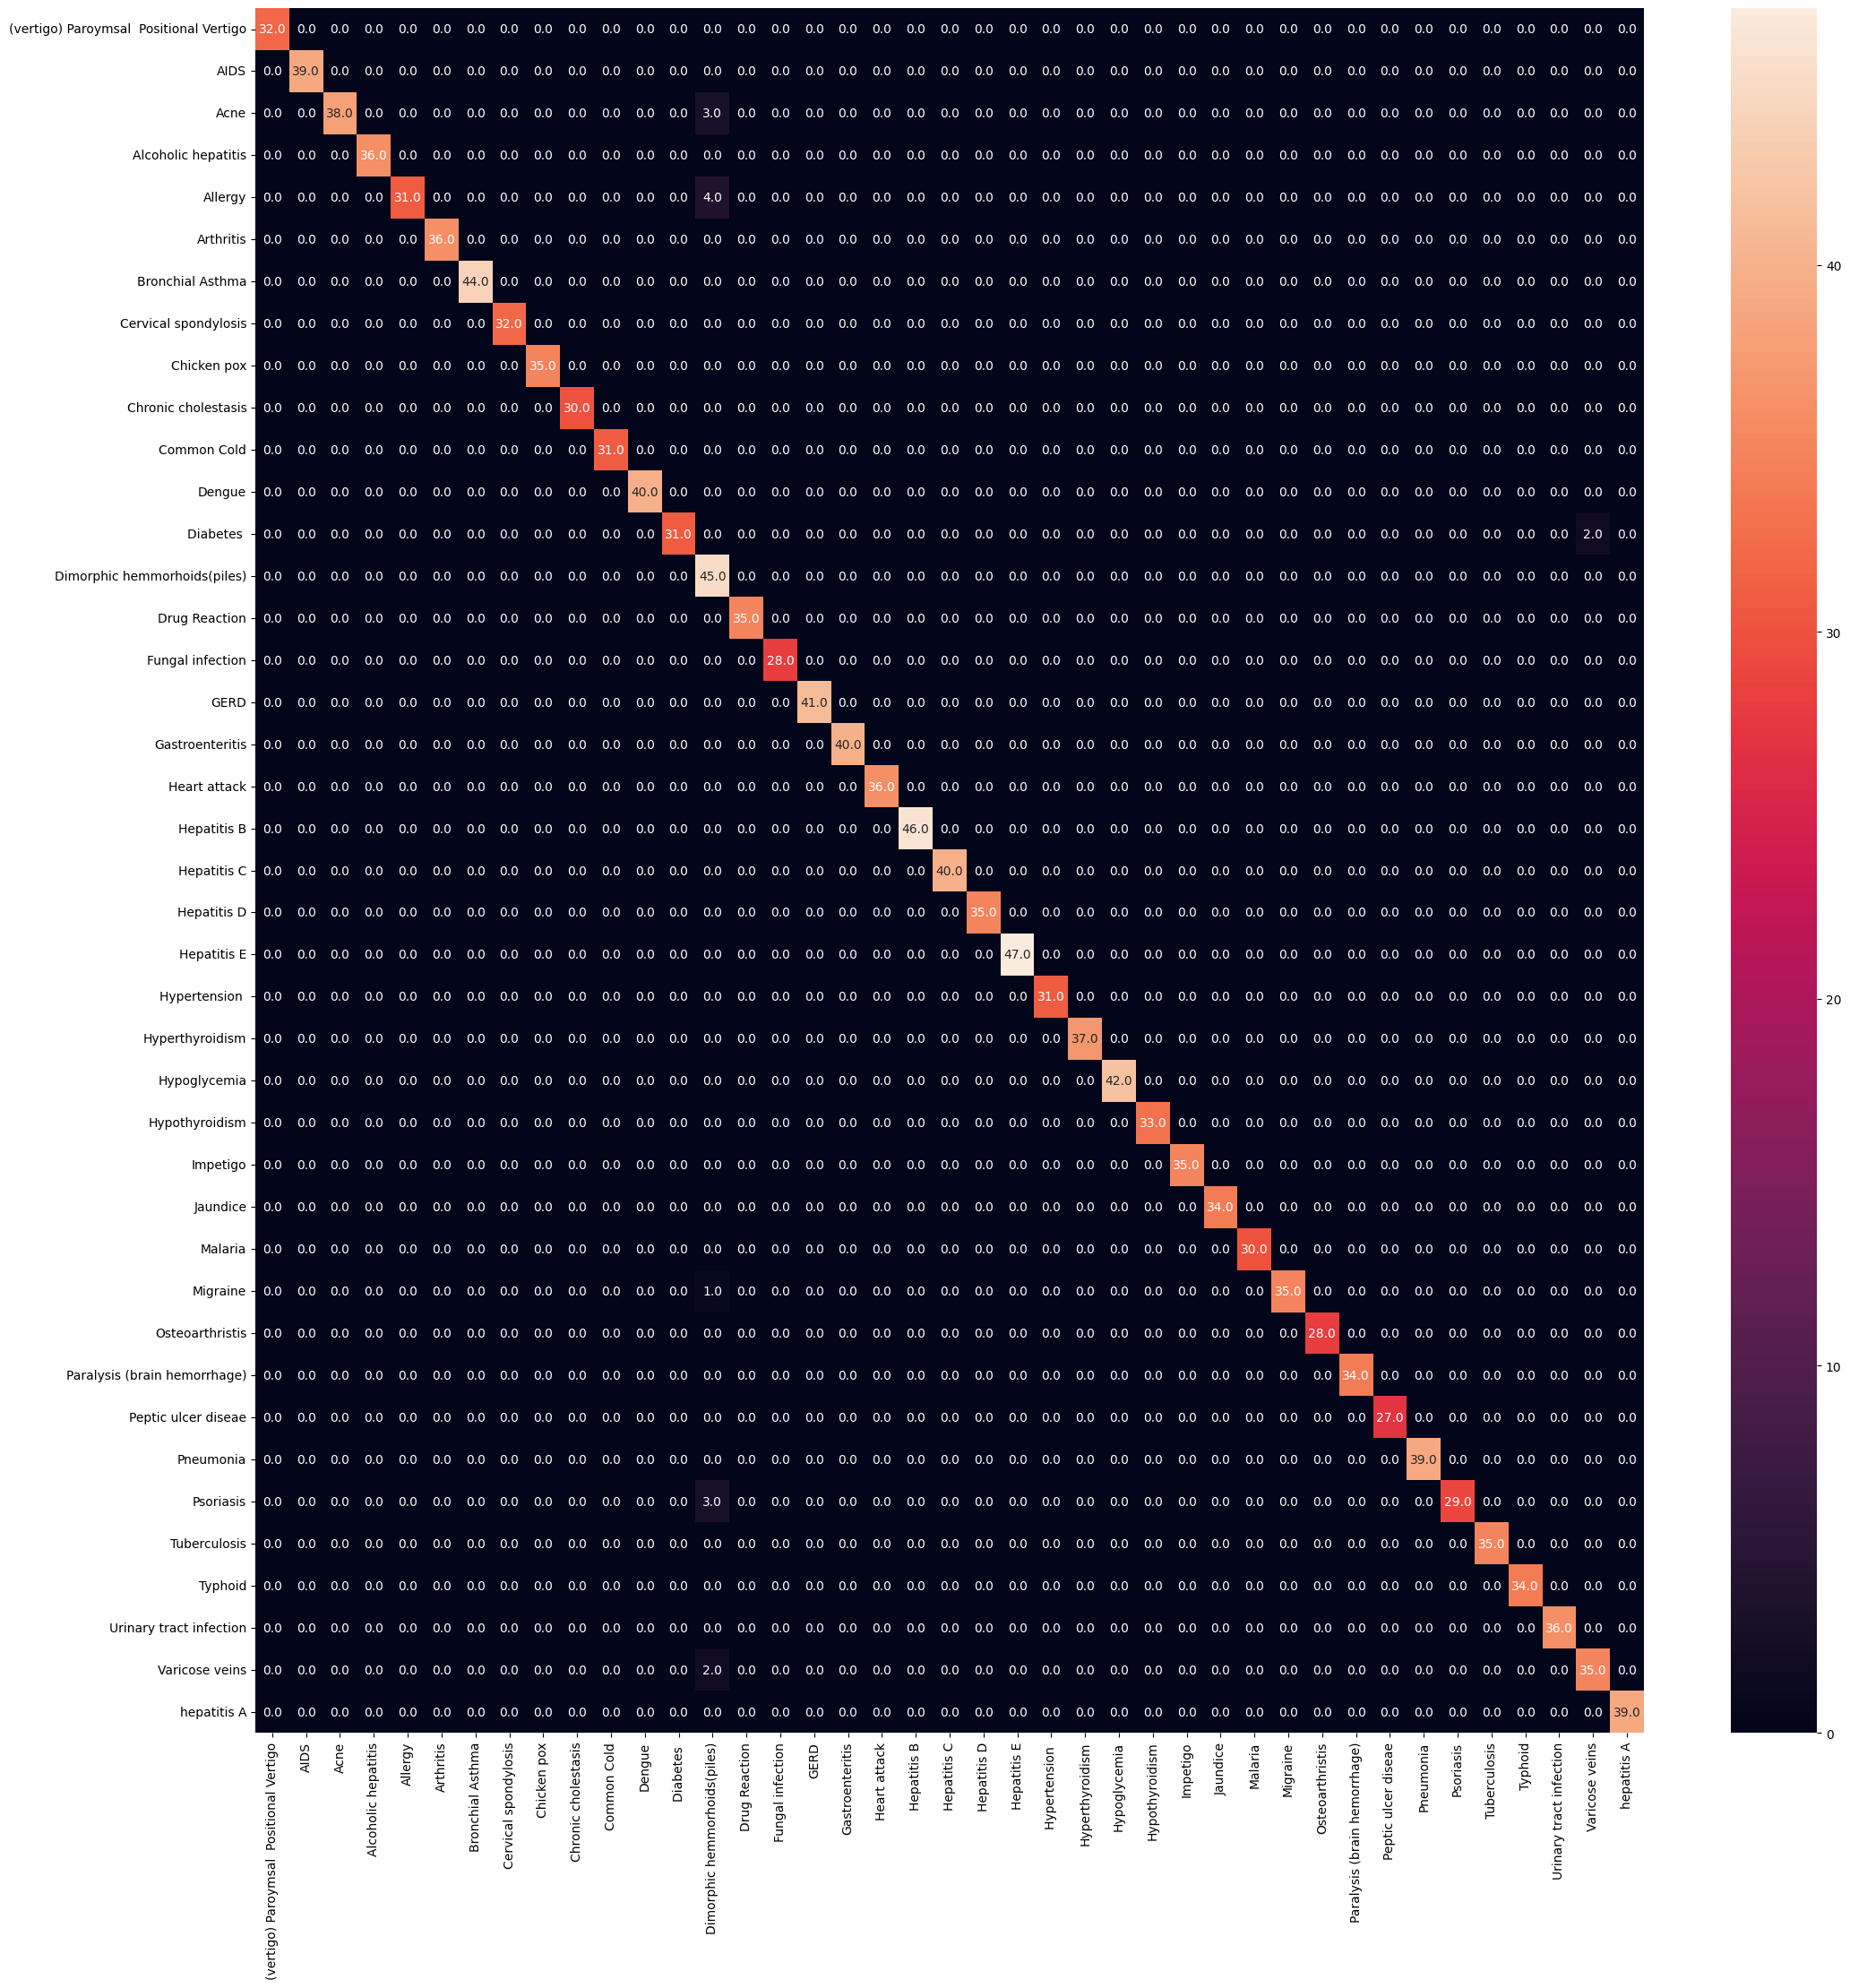

In [85]:
plt.figure(figsize=(25, 25))
sns.heatmap(confusion_matrix(y_test, y_pred_0),annot=True,fmt=".1f",xticklabels=x_labels, yticklabels=y_labels)
plt.show()